In [39]:
import numpy as np
import pandas as pd

#To split the data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#tensorflow 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy
from tensorflow import keras

In [40]:
df = pd.read_csv("clean_train.csv")
df_test = pd.read_csv("clean_test.csv")

In [41]:
ID_labels = df_test['Id']
ID_labels = np.array(ID_labels)

In [42]:
df

,Unnamed: 0,Store,DayOfWeek,Day,Month,Year,Open,Promo,SchoolHoliday,CompetitionDistance,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Sales
0,0,1,5,31,7,2015,1,1,1,1270.0,...,1,0,1,0,0,1,0,0,0,5263
1,1,2,5,31,7,2015,1,1,1,570.0,...,0,0,1,0,0,0,0,1,0,6064
2,2,3,5,31,7,2015,1,1,1,14130.0,...,0,0,1,0,0,0,0,1,0,8314
3,3,4,5,31,7,2015,1,1,1,620.0,...,1,0,0,0,1,1,0,0,0,13995
4,4,5,5,31,7,2015,1,1,1,29910.0,...,0,0,1,0,0,1,0,0,0,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,1,1,2013,0,0,1,1900.0,...,0,0,1,0,0,0,0,1,0,0
1017205,1017205,1112,2,1,1,2013,0,0,1,1880.0,...,1,0,0,0,1,1,0,0,0,0
1017206,1017206,1113,2,1,1,2013,0,0,1,9260.0,...,0,0,0,0,1,1,0,0,0,0
1017207,1017207,1114,2,1,1,2013,0,0,1,870.0,...,0,0,0,0,1,1,0,0,0,0


In [43]:
df_test

,Unnamed: 0,Id,Store,DayOfWeek,Day,Month,Year,Open,Promo,SchoolHoliday,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0,1,1,4,17,9,2015,1.0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,1,2,3,4,17,9,2015,1.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,3,7,4,17,9,2015,1.0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,3,4,8,4,17,9,2015,1.0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,4,5,9,4,17,9,2015,1.0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41083,41084,1111,6,1,8,2015,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0
41084,41084,41085,1112,6,1,8,2015,1.0,0,0,...,0,1,0,0,0,1,1,0,0,0
41085,41085,41086,1113,6,1,8,2015,1.0,0,0,...,0,0,0,0,0,1,1,0,0,0
41086,41086,41087,1114,6,1,8,2015,1.0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [44]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df_test.drop(columns=df_test.columns[0], axis=1, inplace=True)

### Removing features with high correlation

In [45]:
df.drop(['Promo2SinceWeek','PromoInterval_0', 'Promo2SinceYear','Assortment_c'], axis=1, inplace=True)
df_test.drop(['Promo2SinceWeek','PromoInterval_0', 'Promo2SinceYear','Assortment_c'], axis=1, inplace=True)

#### Removing index column from test data

In [46]:
df_test.drop(columns=df_test.columns[0], axis=1, inplace=True)

#### Removing data with sales = 0 as they are not evaluated in test

In [47]:
df_filtered = df[df['Sales'] != 0]

In [48]:
df_filtered

,Store,DayOfWeek,Day,Month,Year,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Sales
0,1,5,31,7,2015,1,1,1,1270.0,9.0,...,0,0,1,0,1,0,0,0,0,5263
1,2,5,31,7,2015,1,1,1,570.0,11.0,...,1,0,0,0,1,0,0,1,0,6064
2,3,5,31,7,2015,1,1,1,14130.0,12.0,...,1,0,0,0,1,0,0,1,0,8314
3,4,5,31,7,2015,1,1,1,620.0,9.0,...,0,0,1,0,0,0,0,0,0,13995
4,5,5,31,7,2015,1,1,1,29910.0,4.0,...,1,0,0,0,1,0,0,0,0,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,1,1,2013,1,0,1,150.0,9.0,...,0,1,0,0,1,0,0,0,0,3375
1016827,733,2,1,1,2013,1,0,1,860.0,10.0,...,0,1,0,0,0,1,0,0,0,10765
1016863,769,2,1,1,2013,1,0,1,840.0,0.0,...,0,1,0,0,0,1,0,1,0,5035
1017042,948,2,1,1,2013,1,0,1,1430.0,0.0,...,0,1,0,0,0,1,0,0,0,4491


In [49]:
df_test

,Store,DayOfWeek,Day,Month,Year,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,4,17,9,2015,1.0,1,0,1270.0,9.0,...,0,0,0,1,0,1,0,0,0,0
1,3,4,17,9,2015,1.0,1,0,14130.0,12.0,...,0,1,0,0,0,1,0,0,1,0
2,7,4,17,9,2015,1.0,1,0,24000.0,4.0,...,0,1,0,0,0,0,0,0,0,0
3,8,4,17,9,2015,1.0,1,0,7520.0,10.0,...,0,1,0,0,0,1,0,0,0,0
4,9,4,17,9,2015,1.0,1,0,2030.0,8.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,1,8,2015,1.0,0,0,1900.0,6.0,...,0,1,0,0,0,1,0,0,1,0
41084,1112,6,1,8,2015,1.0,0,0,1880.0,4.0,...,0,0,0,1,0,0,0,0,0,0
41085,1113,6,1,8,2015,1.0,0,0,9260.0,0.0,...,0,1,0,0,0,0,0,0,0,0
41086,1114,6,1,8,2015,1.0,0,0,870.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
labels = np.array(df_filtered["Sales"])
features = np.array(df_filtered.drop(columns='Sales'))
test = np.array(df_test)

#### Implementing Cost function as in kaggle

In [51]:
from keras import backend as K
def rmspe(y_true, y_pred):
    percentage_error = (y_true - y_pred) / (y_true)
    return tf.sqrt(tf.reduce_mean(tf.square(tf.where(tf.equal(y_true, 0.0), 0.0, percentage_error)))) 

### Splitting the data


In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(features,labels, train_size=0.9,random_state = 42 )

In [53]:
#Normalizing the data
#Standarize data
scaler = StandardScaler()
# Fit on training data and transform both training and validation data
X_train_normalized = scaler.fit_transform(X_train)
X_valid_normalized = scaler.transform(X_valid)
# Create a scaler for the output values
y_scaler = MinMaxScaler()
# Fit on training output and transform both training and validation output
y_train_normalized = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_valid_normalized = y_scaler.transform(y_valid.reshape(-1, 1))

In [54]:
tf_X_train = tf.convert_to_tensor(X_train_normalized)
tf_y_train = tf.convert_to_tensor(y_train_normalized)
tf_X_valid = tf.convert_to_tensor(X_valid_normalized)
tf_y_valid = tf.convert_to_tensor(y_valid_normalized)

### Model Architecture 

In [55]:
model = tf.keras.models.Sequential()

model.add(layers.LSTM(256, input_shape=(25, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 265,473
Trainable params: 264,961
Non-trainable params: 512
_________________________________________________________________


### Model training

In [56]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(),rmspe])

# Train the model
history = model.fit(tf_X_train, tf_y_train, epochs=30, batch_size=256, validation_data=(tf_X_valid, tf_y_valid))

Epoch 1/30


C:\Users\20122\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2969/2969 [==============================] - 199s 66ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - rmspe: 0.5812 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678 - val_rmspe: 0.4709
Epoch 2/30
2969/2969 [==============================] - 199s 67ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - rmspe: 0.5056 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1324 - val_rmspe: 1.2571
Epoch 3/30
2969/2969 [==============================] - 199s 67ms/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - rmspe: 0.4940 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0836 - val_rmspe: 0.8153
Epoch 4/30
2969/2969 [==============================] - 215s 72ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - rmspe: 0.4844 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0718 - val_rmspe: 0.6566
Epoch 5/30
2969/2969 [==============================] - 219s 74ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611 - rmspe: 0.4622 - val_loss: 0.0036 - va

In [57]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0005),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(),rmspe])

# Train the model
history1 = model.fit(tf_X_train, tf_y_train, epochs=5, batch_size=256, validation_data=(tf_X_valid, tf_y_valid))

Epoch 1/5
2969/2969 [==============================] - 207s 69ms/step - loss: 2.6642e-04 - root_mean_squared_error: 0.0163 - rmspe: 0.1154 - val_loss: 2.8624e-04 - val_root_mean_squared_error: 0.0169 - val_rmspe: 0.1115
Epoch 2/5
2969/2969 [==============================] - 235s 79ms/step - loss: 2.5818e-04 - root_mean_squared_error: 0.0161 - rmspe: 0.1138 - val_loss: 2.9186e-04 - val_root_mean_squared_error: 0.0171 - val_rmspe: 0.1171
Epoch 3/5
2969/2969 [==============================] - 215s 72ms/step - loss: 2.5604e-04 - root_mean_squared_error: 0.0160 - rmspe: 0.1137 - val_loss: 2.7780e-04 - val_root_mean_squared_error: 0.0167 - val_rmspe: 0.1164
Epoch 4/5
2969/2969 [==============================] - 226s 76ms/step - loss: 2.5189e-04 - root_mean_squared_error: 0.0159 - rmspe: 0.1129 - val_loss: 2.6861e-04 - val_root_mean_squared_error: 0.0164 - val_rmspe: 0.1119
Epoch 5/5
2969/2969 [==============================] - 209s 71ms/step - loss: 2.5174e-04 - root_mean_squared_error: 0.01

In [58]:
# Compile the model
model.compile(optimizer=Adam(lr=0.00001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(),rmspe])

# Train the model
history2 = model.fit(tf_X_train, tf_y_train, epochs=5, batch_size=256, validation_data=(tf_X_valid, tf_y_valid))

Epoch 1/5
2969/2969 [==============================] - 226s 75ms/step - loss: 2.2464e-04 - root_mean_squared_error: 0.0150 - rmspe: 0.1077 - val_loss: 2.4935e-04 - val_root_mean_squared_error: 0.0158 - val_rmspe: 0.1088
Epoch 2/5
2969/2969 [==============================] - 206s 70ms/step - loss: 2.1817e-04 - root_mean_squared_error: 0.0148 - rmspe: 0.1065 - val_loss: 2.4766e-04 - val_root_mean_squared_error: 0.0157 - val_rmspe: 0.1081
Epoch 3/5
2969/2969 [==============================] - 211s 71ms/step - loss: 2.1697e-04 - root_mean_squared_error: 0.0147 - rmspe: 0.1065 - val_loss: 2.4688e-04 - val_root_mean_squared_error: 0.0157 - val_rmspe: 0.1081
Epoch 4/5
2969/2969 [==============================] - 216s 73ms/step - loss: 2.1642e-04 - root_mean_squared_error: 0.0147 - rmspe: 0.1063 - val_loss: 2.4623e-04 - val_root_mean_squared_error: 0.0157 - val_rmspe: 0.1080
Epoch 5/5
2969/2969 [==============================] - 209s 70ms/step - loss: 2.1543e-04 - root_mean_squared_error: 0.01

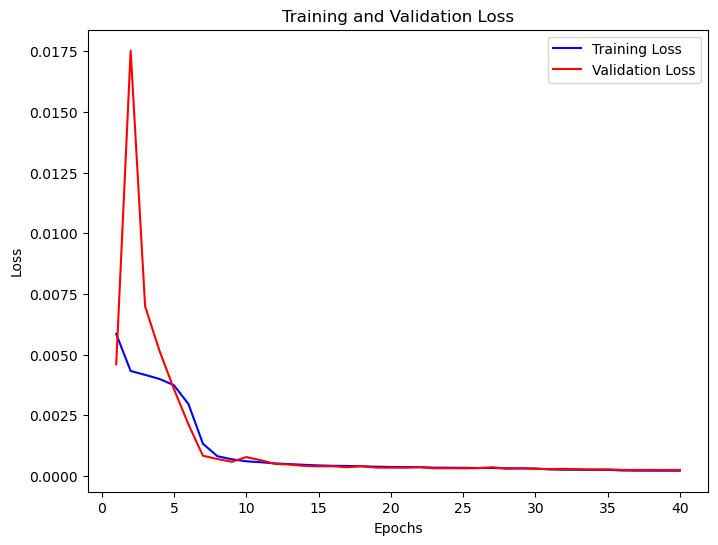

In [59]:
import matplotlib.pyplot as plt

# Accessing the training history
train_loss = history.history['loss']    +history1.history['loss']    +history2.history['loss']    
val_loss =   history.history['val_loss']+history1.history['val_loss']+history2.history['val_loss']
#train_loss.append(history1.history['loss'])
#val_loss.append(history1.history['val_loss'])

# Plotting the training and validation errors
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

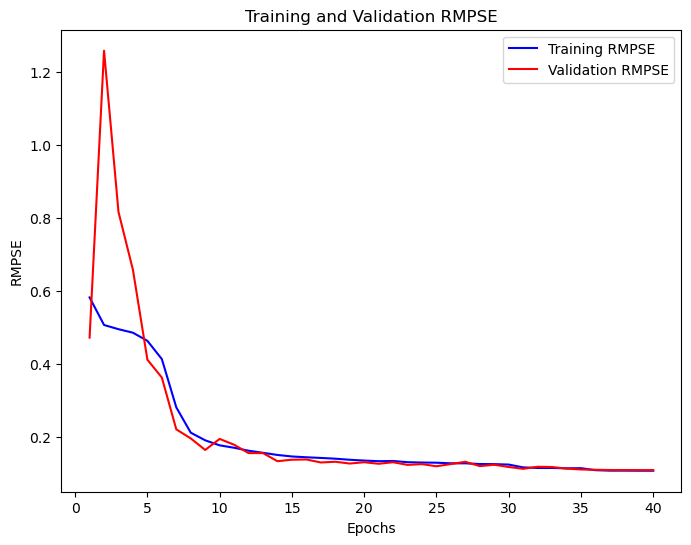

In [60]:
# Accessing the training history
train_loss = history.history['rmspe']    +history1.history['rmspe']    +history2.history['rmspe']    
val_loss =   history.history['val_rmspe']+history1.history['val_rmspe']+history2.history['val_rmspe']
#train_loss.append(history1.history['loss'])
#val_loss.append(history1.history['val_loss'])

# Plotting the training and validation errors
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'b', label='Training RMPSE')
plt.plot(epochs, val_loss, 'r', label='Validation RMPSE')
plt.title('Training and Validation RMPSE')
plt.xlabel('Epochs')
plt.ylabel('RMPSE')
plt.legend()
plt.show()

In [61]:
X_test_normalized = scaler.transform(test)
tf_X_test = tf.convert_to_tensor(X_test_normalized)
# Assuming model is your trained regression model
normalized_predictions = model.predict(tf_X_test)

# Inverse transform the normalized predictions to get the true values
true_predictions = y_scaler.inverse_transform(normalized_predictions.reshape(-1, 1))

1284/1284 [==============================] - 11s 8ms/step


In [67]:
normalized_predictions.shape

(41088, 1)

In [62]:
predicted_df = pd.DataFrame(true_predictions, columns=['Sales'])
predicted_df.insert(0, 'Id', ID_labels)
predicted_df.insert(2, 'Open', df_test['Open'])
# Function to replace negative numbers with zero
replace_negatives = lambda x: 0 if x < 0 else x

# Apply the function using applymap to the entire DataFrame
predicted_df['Sales'] = predicted_df['Sales'].map(replace_negatives)
predicted_df['Sales'] = np.where(predicted_df['Open'] == 0, 0, predicted_df['Sales'])
predicted_df.drop(columns=predicted_df.columns[2], axis=1, inplace=True)
mean_value = predicted_df['Sales'].mean()
predicted_df['Sales'].fillna(mean_value, inplace=True)
predicted_df.to_csv("predicted_last.csv")

In [63]:
predicted_df[['Id','Sales']]

,Id,Sales
0,1,4332.937988
1,2,7920.853027
2,3,9826.136719
3,4,7102.532227
4,5,7346.685059
...,...,...
41083,41084,2529.063232
41084,41085,7170.353027
41085,41086,5906.297363
41086,41087,20423.826172


In [64]:
num_negatives = (predicted_df['Sales'] < 0).sum()
num_negatives

0

In [65]:
predicted_df.isna().sum()

Id       0
Sales    0
dtype: int64

In [ ]:
c799606579b832@crankymonkey.info